# Binary Classification of Bank Portfolios Using Neural Networks

## Introduction
This notebook focuses on building and evaluating a binary classification model using neural networks to predict the class of bank portfolio data. The data is preprocessed using scaling, sampling, and resampling techniques to handle class imbalance. The model's performance is evaluated through confusion matrices, showcasing the effectiveness of various balancing strategies.

## Steps Overview

1. **Imports and Configuration**
   - Import necessary libraries, including Pandas, NumPy, Keras for deep learning, and scikit-learn for data preprocessing and model evaluation.
   - Set the random seed for reproducibility.

2. **Data Loading and Preprocessing**
   - Load the dataset containing bank portfolio data.
   - Standardize the feature columns using `StandardScaler`.
   - Rename the last column to 'Class' to improve readability.

3. **Data Splitting**
   - Split the dataset into training and testing sets to evaluate the model's performance.

4. **Model Building and Training**
   - Build a neural network model using Keras Sequential API.
   - Compile and train the model on the training data using binary cross-entropy loss.

5. **Initial Model Evaluation**
   - Evaluate the trained model on the test set.
   - Generate predictions and plot confusion matrices to analyze the model's performance.

6. **Handling Imbalanced Classes: Undersampling**
   - Implement undersampling to balance the classes by randomly selecting a subset of the majority class.
   - Retrain the model on the undersampled dataset.
   - Evaluate and plot confusion matrices for the undersampled model.

7. **Handling Imbalanced Classes: Oversampling with SMOTE**
   - Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes by generating synthetic samples for the minority class.
   - Retrain the model on the oversampled dataset.
   - Evaluate and plot confusion matrices for the SMOTE-balanced model.


---

## Detailed Sections

### 1. Imports and Configuration
We start by importing the required libraries, including Pandas for data handling, Keras for neural network modeling, and scikit-learn for preprocessing and evaluation. The random seed is set to ensure reproducible results.

### 2. Data Loading and Preprocessing
The dataset is loaded using Pandas, and the feature columns are standardized using `StandardScaler` to ensure the data is normalized. The target column is renamed to 'Class' for clarity.

### 3. Data Splitting
The data is split into training and testing sets using an 80-20 split, allowing the model to be trained on one portion of the data and tested on another to evaluate its generalization ability.

### 4. Model Building and Training
A neural network model is constructed using Keras with several dense layers and dropout for regularization. The model is compiled with the Adam optimizer and binary cross-entropy loss function, then trained on the training set.

### 5. Initial Model Evaluation
The trained model is evaluated on the test data, with predictions generated for further analysis. Confusion matrices are plotted to visualize the model's classification performance, showing how well it distinguishes between the two classes.

### 6. Handling Imbalanced Classes: Undersampling
To address class imbalance, undersampling is used, which involves reducing the size of the majority class. A new model is trained on this balanced subset, and its performance is evaluated using confusion matrices.

### 7. Handling Imbalanced Classes: Oversampling with SMOTE
SMOTE is applied to create synthetic samples of the minority class, balancing the dataset without losing data from the majority class. The model is retrained on the SMOTE-adjusted data, and performance is re-evaluated using confusion matrices.




### 1. Imports and Configuration

In [ ]:
!pip install pandas numpy keras matplotlib scikit-learn imbalanced-learn


In [52]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


np.random.seed(2)

### 2. Data Loading and Preprocessing

In [54]:
data = pd.read_csv('bankPortfolios.csv')

data.head()

,2699,6107,9965,1036,2924,3786,4573,1087,617,76.827,769,1828.2,381,933,32673,1
0,759920.0,6480.0,588660.0,528110.0,1188700.0,169400.0,174890.0,10210.0,6566.0,21101.00,211210.0,428740.0,82487.0,68882.0,3770300.0,1
1,129080.0,729.0,72972.0,3310.0,73909.0,34.0,44928.0,32995.0,409.0,502.00,15599.0,57902.0,20800.0,12168.0,423250.0,1
2,57828.0,1449.8,27634.0,1739.0,39274.0,1838.3,9854.0,1900.0,321.0,228.98,2291.9,7696.0,4609.0,7823.0,145830.0,1
3,1021.0,14222.0,3186.0,35.0,4776.0,29645.0,9295.0,3245.0,493.0,215.00,4932.0,20818.0,891.0,3661.0,87600.0,1
4,149560.0,93281.0,211800.0,7950.0,151300.0,16933.0,32142.0,2020.0,880.0,3106.00,17057.0,137950.0,12992.0,22517.0,792090.0,1


In [56]:
data.iloc[:, :-1] = sc.fit_transform(data.iloc[:, :-1])

# change the last column name 1 to 'Class'
data.rename(columns={'1': 'Class'}, inplace=True)
data.head()

,2699,6107,9965,1036,2924,3786,4573,1087,617,76.827,769,1828.2,381,933,32673,Class
0,0.626612,-0.039225,0.021046,1.363177,0.581567,0.278336,-0.007969,-0.037124,-0.023536,0.033683,0.048713,0.024422,0.203004,0.003597,0.087925,1
1,0.028024,-0.048131,-0.034434,-0.055347,-0.047822,-0.057001,-0.040954,-0.031949,-0.028403,-0.048722,-0.036377,-0.038803,0.006786,-0.036993,-0.039332,1
2,-0.039585,-0.047015,-0.039312,-0.059593,-0.067376,-0.053429,-0.049856,-0.039011,-0.028472,-0.049814,-0.042165,-0.047362,-0.044715,-0.040103,-0.049880,1
3,-0.093488,-0.027235,-0.041942,-0.064199,-0.086853,0.001627,-0.049998,-0.038706,-0.028336,-0.049870,-0.041017,-0.045125,-0.056542,-0.043081,-0.052094,1
4,0.047457,0.095199,-0.019499,-0.042805,-0.004129,-0.023542,-0.044200,-0.038984,-0.028030,-0.038304,-0.035743,-0.025155,-0.018050,-0.029586,-0.025309,1


In [58]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

y.head()

,Class
0,1
1,1
2,1
3,1
4,1


### 3. Data Splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [60]:
X_train.shape

(5447, 15)

In [61]:
X_test.shape

(2335, 15)

In [62]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 4. Model Building and Training

In [64]:
model = Sequential([
    Dense(units=16, input_dim = 15,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

/Users/francescostocchi/anaconda3/envs/machine_learning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,693 (6.61 KB)

 Trainable params: 1,693 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9159 - loss: 0.4114
Epoch 2/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9643 - loss: 0.1543
Epoch 3/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9638 - loss: 0.1467
Epoch 4/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.9654 - loss: 0.1353
Epoch 5/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9643 - loss: 0.1324


### 5. Initial Model Evaluation

In [67]:
score = model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9463 - loss: 0.1805 


In [68]:
print(score)

[0.16490082442760468, 0.9533190727233887]


In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=True, # True for normalization and False for normalization
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Define the threshold for changing the text color in the blocks
    thresh = cm.max() / 2.

    # Annotate the blocks
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}\n(TP)" if i == j and i == 1 else
                 f"{cm[i, j]:.2f}\n(TN)" if i == j and i == 0 else
                 f"{cm[i, j]:.2f}\n(FP)" if j == 1 else
                 f"{cm[i, j]:.2f}\n(FN)",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [70]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

Confusion Matrix 
[[2226    0]
 [ 109    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


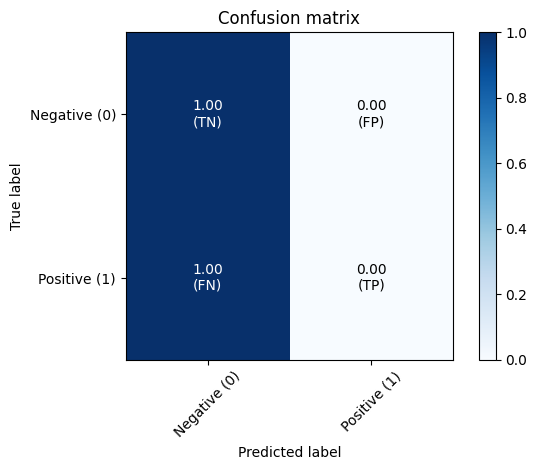

In [72]:
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
Confusion Matrix 
[[7477    0]
 [ 305    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


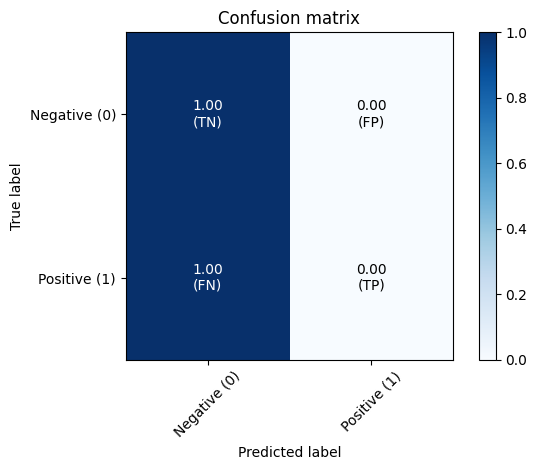

In [74]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

### 6. Handling Imbalanced Classes: Undersampling

In [75]:
# Get the indices of fraudulent records (Class == 1)
fraud_indices = np.array(data[data.Class == 1].index)
# Count the number of fraudulent records
number_records_fraud = len(fraud_indices)

# Get the indices of normal records (Class == 0)
normal_indices = data[data.Class == 0].index
# Randomly select the same number of normal records as there are fraudulent records
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
# Convert the selected indices to a NumPy array
random_normal_indices = np.array(random_normal_indices)
# Print the number of randomly selected normal records

# Combine the indices of fraudulent and randomly selected normal records for under-sampling
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
# Print the total number of under-sampled records

# Create an under-sampled dataset using the selected indices
under_sample_data = data.iloc[under_sample_indices, :]
# Separate features (X) and target labels (y) from the under-sampled data
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Split the under-sampled dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

# Convert the training and testing sets to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


305


In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,081 (19.85 KB)

 Trainable params: 1,693 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,388 (13.24 KB)

In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.4643 - loss: 1.1492 
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5481 - loss: 0.7672
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.6204 - loss: 0.6681
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6550 - loss: 0.6475
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7363 - loss: 0.5622


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix 
[[85 11]
 [37 50]]
Normalized confusion matrix
[[0.88541667 0.11458333]
 [0.42528736 0.57471264]]


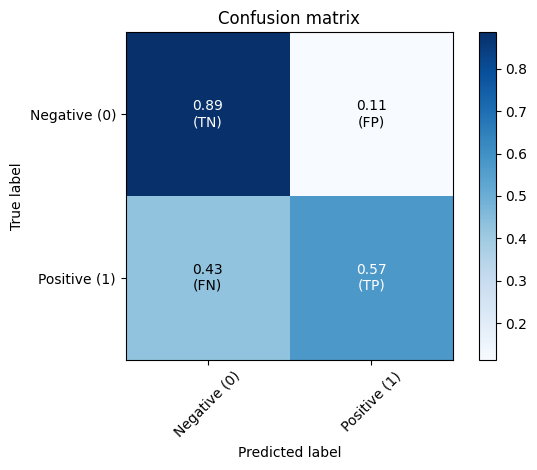

In [85]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
Confusion Matrix 
[[6233 1244]
 [ 103  202]]
Normalized confusion matrix
[[0.83362311 0.16637689]
 [0.33770492 0.66229508]]


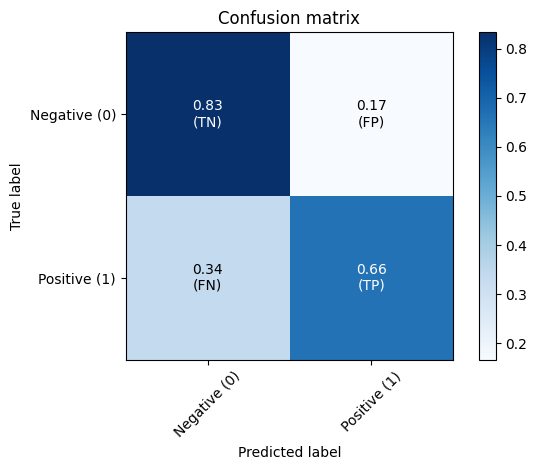

In [86]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

### 7. Handling Imbalanced Classes: Oversampling with SMOTE

In [88]:
X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [92]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5


698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7456 - loss: 0.5469
Epoch 2/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7641 - loss: 0.4959
Epoch 3/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7774 - loss: 0.4925
Epoch 4/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7743 - loss: 0.4773
Epoch 5/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7763 - loss: 0.4715


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
Confusion Matrix 
[[1810  430]
 [ 513 1734]]
Normalized confusion matrix
[[0.80803571 0.19196429]
 [0.22830441 0.77169559]]


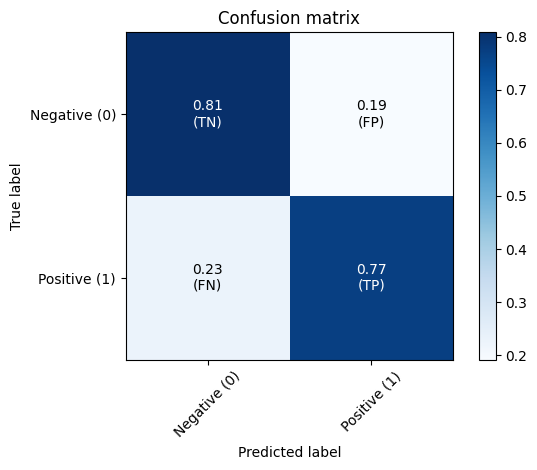

In [93]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
Confusion Matrix 
[[5984 1493]
 [  75  230]]
Normalized confusion matrix
[[0.80032098 0.19967902]
 [0.24590164 0.75409836]]


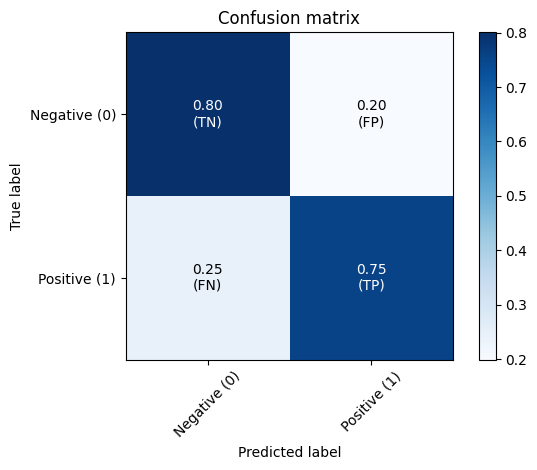

In [94]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()